In [1]:
from rules import *
from simulators import Simulator

from random import Random

from IPython.display import Markdown as md
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# 初始金额
START_CASH = 100
# 重复次数
SIMUTALOR_COUNT = 100000
# 最多交易数
ITER_COUNT = 100
# 随机种子，用来复现某一次随机过程
seed = Random().random()
# 规则
rules = [
    # 当手持金额是0时，退出交易
     TerminateRule(lambda luck, step: step < 0)
]
# 40%的概率赚10元
# 60%的概率赔5元
rules += ProbabilityRuleGenerator()\
    .new_rule(SimpleAddRule, 0.4, 10)\
    .new_rule(SimpleSubRule, 0.6, 5)

In [3]:
seed

0.6657650215842648

In [4]:
random = Random(seed)
simulators = [Simulator(START_CASH, rules, random) for _ in range(SIMUTALOR_COUNT)]
for simulator in simulators:
    for i in range(ITER_COUNT):
        simulator.simulate()

In [5]:
result_list = [s.result for s in simulators]

(array([2.72180e+04, 1.03929e+05, 2.51540e+05, 3.14410e+05, 2.09898e+05,
        7.61840e+04, 1.50470e+04, 1.67400e+03, 9.60000e+01, 4.00000e+00]),
 array([ -5. ,  54.5, 114. , 173.5, 233. , 292.5, 352. , 411.5, 471. ,
        530.5, 590. ]),
 <BarContainer object of 10 artists>)

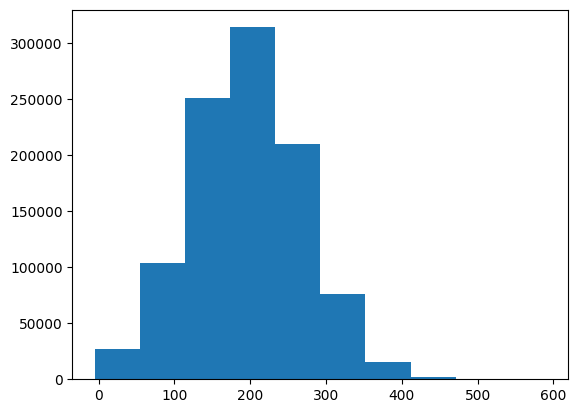

In [6]:
n_bin = 10
plt.hist(result_list, bins=n_bin)

In [7]:
md("上图中，横坐标是%i次交易后的金额，纵坐标是有多少个模拟数据达到了这个金额" % (ITER_COUNT))

上图中，横坐标是100次交易后的金额，纵坐标是有多少个模拟数据达到了这个金额